# Just a playground to test my ideas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("medical_examination.csv")

### Calculate overweight

In [3]:
df["overweight"] = (df["weight"] / ((df["height"] / 100) ** 2) > 25).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


### Cholesterol and glucose normalisation

In [4]:
df["cholesterol"].unique() 

array([1, 3, 2])

In [5]:
df["gluc"].unique() 

array([1, 2, 3])

In [6]:
df["cholesterol"] = (df["cholesterol"] > 1).astype(int)
df["gluc"] = (df["gluc"] > 1).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


### Cardio plot

Converting data to long format:

In [7]:
long_df = pd.melt(df, id_vars=["cardio"], value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])
long_df

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


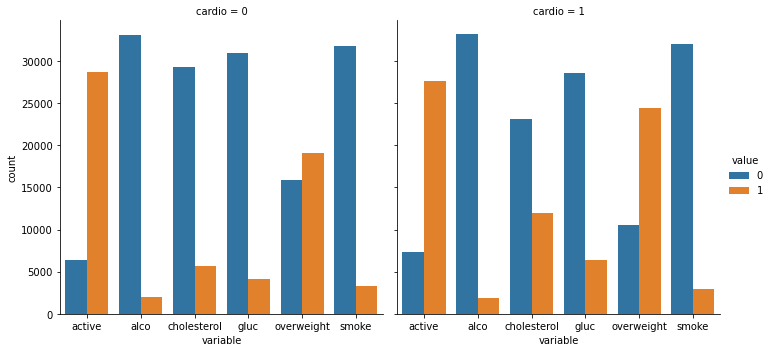

In [8]:
sns.catplot(data=long_df, kind="count", x="variable", hue="value", col="cardio")

### Cleaning the data

In [12]:
df = df[df["ap_lo"] <= df["ap_hi"]]

In [13]:
df = df[df["height"] >= df["height"].quantile(0.025)]
df = df[df["height"] <= df["height"].quantile(0.975)]

In [14]:
df = df[df["weight"] >= df["weight"].quantile(0.025)]
df = df[df["weight"] <= df["weight"].quantile(0.975)]

In [15]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


### Correlation matrix

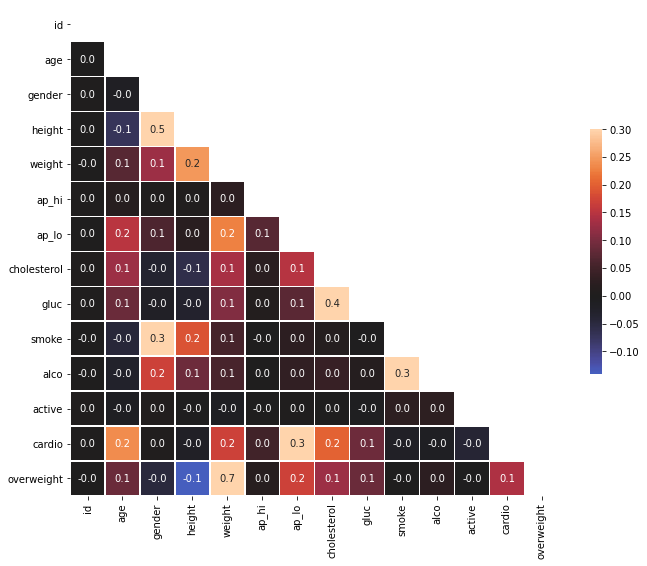

In [29]:
# Inspired by https://seaborn.pydata.org/examples/many_pairwise_correlations.html example
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1f")